# CO-oxidation in a platinum model.

In {cite}`Khibnik@1990`, {cite}`ByKov@1978`,  {cite}`Beyn@1994` the following
chemical model is considered

$$
\begin{cases}
\begin{aligned}
z &= 1 - x - y - s, \\
\dot x &= 2k_1z^2 - 2k_{-1}x^2 - k_3xy, \\
\dot y &= k_2z - k_{-2}y - k_3xy, \\
\dot s &= k_4(z - \lambda s).
\end{aligned}
\end{cases}
$$

The model describes CO-oxidation in platinum.  Here $x, y, z$ and $s$ are the
concentrations with $x + y + z + s = 1$ and $k_i$ stand for the reaction rate
constants. 

## Overview

In this demo we will revisit and extend the results from {cite}`Bashir@2015`,
using the new homoclinic predictor from {cite}`Bosschaert@2021`. Thus, we will:

- Compute a curve of equilibria, parametrized by $k_2$.
- Detect two limit points (LP).
- Start continuation from the limit points in two parameters $(\lambda,k_2)$.
- Detect two Bogdanov-Takens points.
- Start continuation of the homoclinic bifurcation curve emanating from the
  Bogdanov-Takens points in two parameters $(\lambda,k_2)$.  
- Compare the predicted and computed homoclinic bifurcation curve emanating
  from the first Bogdanov-Takens point in parameters space.
- Create a convergence plot comparing the different homoclinic approximations
  derived in {cite}`Bosschaert@2021`.

## Load MatCont

Before we can start using __MatCont__ we need to add the main directory of
__MatCont,__ as well as various subdirectories of __MatCont,__ to the _MATLAB
search path_. This is done in the code below. The variable `matcont_home`
should point to the main directory of __MatCont.__

In [1]:
clear all
restoredefaultpath
matcontpath = '../../';
addpath(matcontpath)
addpath([matcontpath, 'Equilibrium'])
addpath([matcontpath, 'Systems'])
addpath([matcontpath, 'Hopf'])
addpath([matcontpath, 'Homoclinic'])
addpath([matcontpath, 'LimitPoint'])
addpath([matcontpath, 'LimitCycle'])
addpath([matcontpath, 'Continuer'])
addpath([matcontpath, 'MultilinearForms'])
addpath([matcontpath, 'Utilities'])
set(groot, 'defaultTextInterpreter', 'LaTeX');
set(0,'defaultAxesFontSize',15)
set(groot, 'defaultLineMarkerSize', 20);

## Set the odefile

Next we set the variable `odefile` to the _system file_ previously generated by
the script [CO-oxidationGenSym.ipynb](./CO-oxidationGenSym.ipynb).

In [2]:
odefile=@CO_oxidation;

## Define equilibrium

We manually define an equilibrium at

```{math}
:label: eq:COoxidation:equilibrium
(x,y,s) = (0.00295, 0.76211, 0.1678),
```

with parameter values $k_1=2.5, k_{-1} = 1, k_3 = 10, k_2 = 0, k_{-2} = 0.1, k_4 = 0.0675$ and $\lambda = 1$.

To refer to the parameters throughout the script we create a __cell array__ of
strings containing the parameter names. This is then converted into a
__struct__. This allows us to refer to the parameters as `ind.parametername`,
similar as done in _DDE-BifTool_.

In [3]:
parnames = {'k1', 'km1', 'k3', 'k2', 'km2', 'k4', 'lambda'};
cind = [parnames;num2cell(1:length(parnames))];
ind  = struct(cind{:});
p(ind.k1) = 2.5;
p(ind.km1) = 1;
p(ind.k3) = 10;
p(ind.km2) = 0.1;
p(ind.k4) = 0.0675;
p(ind.lambda) = 1;
x  = [0.00295; 0.76211; 0.1678];

## Continue equilibrium in parameter $k_2$

To continue the equilibrium {eq}`eq:COoxidation:equilibrium` in parameter
$k_2$, we first need to obtain a tangent vector to the curve. This is done by
the function `init_EP_EP`. Then we use the function `contset` to obain a
__struct__ containing a list of options which is passed on to the continuer. By
adjusting the values of the fields of the `opt` __struct__ we set the minimum,
initial and maximum step sizes, as well as the direction in which to
continue (`opt.Backward`), i.e. in the direction of the obtained tangent vector
`v1_pred`, or its negative. We also set the maximum number of points to
continue and weather or not to detect bifurcation points (`opt.Singularities`)
on the equilibrium curve. For more information about all options available to
the _MatCont_ continuer and the continuation process in general, we refer to
{cite}`MatCont@2008`.

Finally, we continue the curve using the function `cont`. 

In [4]:
[x1_pred, v1_pred] = init_EP_EP(odefile, x, p, ind.k2);
opt = contset;
opt.MinStepsize   = 0.00001;
opt.InitStepsize  = 0.0001;
opt.MaxStepsize   = 0.1;
opt.Backward      = 1;
opt.MaxNumPoints  = 300;
opt.Singularities = 1;
[eqbr_x, ~, eqbr_bif_data] = cont(@equilibrium, x1_pred, v1_pred, opt);

first point found
tangent vector to first point found
label = LP, x = ( 0.014843 0.696880 0.144138 1.201115 )
a=1.931461e+00
Neutral saddle
label = H , x = ( 0.016833 0.679849 0.151659 1.202834 )
Neutral saddle
label = H , x = ( 0.116822 0.318191 0.282493 1.428482 )
label = LP, x = ( 0.117575 0.316719 0.282853 1.428493 )
a=-2.384097e+01
label = H , x = ( 0.916533 -0.174248 0.128858 -12.529060 )
First Lyapunov coefficient = -2.462095e+00

elapsed time  = 0.7 secs
npoints curve = 300


There are two limit points detected (LP), two neutral saddles (H) and one Hopf
bifurcation point (H). The __array struct__ `eqbr_bif_data` contains
information about the detected bifurcation points. We use this to extract the
index of the detected bifurcation points on the equilibrium curve `eqbr_x`. The
equilibrium curve `eqbr_x` is just a two dimensional array. Each column
consists of a point on the curve. The first three rows contain the point
$(x,y,s)$ while the last row contains the parameter $k_2$.

Below we plot the equilibrium curve `eqbr_x`, together with the detected Hopf and
limit points, in $(s,k_2)$-space.

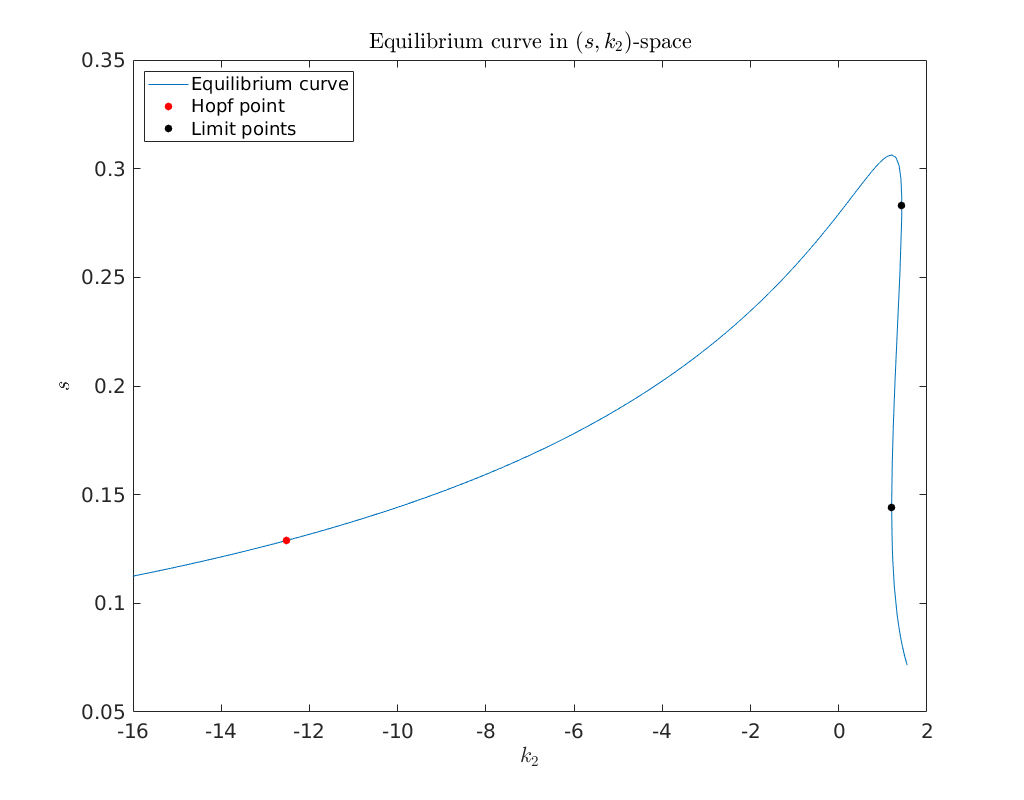

In [5]:
%plot --width 1024 --height 800
hopfPointInfo   = eqbr_bif_data(strcmp({eqbr_bif_data.msg}, 'Hopf')==1);
limitPointsInfo = eqbr_bif_data(strcmp({eqbr_bif_data.msg}, 'Limit point')==1);
HopfPoint = eqbr_x(:,hopfPointInfo.index);
limitpoint1 = eqbr_x(:,limitPointsInfo(1).index);
limitpoint2 = eqbr_x(:,limitPointsInfo(2).index);
plot(eqbr_x(4,:), eqbr_x(3,:)); hold on
plot(HopfPoint(4), HopfPoint(3), '.r' ,'MarkerSize', 20)
plot(limitpoint1(4), limitpoint1(3),  '.k' ,'MarkerSize', 20)
plot(limitpoint2(4), limitpoint2(3),  '.k' ,'MarkerSize', 20)
xlabel('$k_2$')
ylabel('$s$')
legend({'Equilibrium curve', 'Hopf point', 'Limit points'}, 'Location', 'NorthWest')
title('Equilibrium curve in $(s,k_2)$-space')
axis([-16 2 0.05 0.35])

## Construct limit point

To continue the first limit point in the parameters $k_2$ and $\lambda$ we
construct a new point `lp` containing the position and parameter values. These
are needed to obtain an initial tangent vector - using the function
`init_LP_LP` - in the full phase/parameter space. Since, from now on, we will
be using the continuation parameter $k_2$ and $\lambda$ frequently we assigned
these parameters to the variable `ap` (active parameters).

In [6]:
ap = [ind.k2 ind.lambda]; % continuation parameters
lp1.par = p;
lp1.par(ap) = eqbr_x(4, limitPointsInfo(1).index);
lp1.x = eqbr_x(1:3, limitPointsInfo(1).index);
[x1, v1] = init_LP_LP(odefile, lp1.x, lp1.par', ap);

## Continue limit point in parameters $k$ and $T_m$

We continue the limit point curve using again the function `cont`. We use the
same continuation options as before defined below in the __struct__ `opt`,
except for the direction of continuation.

In [7]:
opt.Backward = 0;
opt.TestTolerance = 1e-12;
opt.MaxTestIters = 10;
[lp_br1, ~, lp_br1_bif] = cont(@limitpoint, x1, v1, opt);

first point found
tangent vector to first point found
label = BT, x = ( 0.016337 0.638410 0.200456 1.161199 0.722339 )
(a,b)=(-4.822565e-02, -1.937633e+00)
label = CP, x = ( 0.035941 0.352005 0.451370 1.006408 0.355991 )
c=3.627887e-01
label = BT, x = ( 0.115909 0.315467 0.288437 1.417628 0.971398 )
(a,b)=(-8.378444e-02, -2.136280e+00)

elapsed time  = 1.1 secs
npoints curve = 300


There are two Bogdanov-Takens bifurcation points (BT) detected on the limit
point branch `lp_br1`. The second detected Bogdanov-Takens point coincides with
the Bogdanov-Takens point teated in {cite}`Beyn@1994`.

As with the limit points, information about the detected bifurcation points in
stored in the __struct array__ `lp_br1_bif`. Below we extract the
Bogdanov-Takens bifurcation points.

In [8]:
bt_points_info = lp_br1_bif(strcmp({lp_br1_bif.label}, 'BT')==1);

## Initial prediction of homoclinic orbit near Bogdanov-Takens point 1  (bt1)

To obtain an initial approximation to the homoclinic solution near the
Bogdanov-Takens point we use the function `init_BT_Hom`. Its arguments are the
system file (`odefile`), the Bogdanov-Takens point (`bt`) as defined above, the
unfolding parameters  (`ap`) and an options structure (`BToptions`). The options
structure created with the function `BT_Hom_set_options` contains the following
fields:

- `ntst` Number of mesh intervals with a default value of 40.
- `ncol` Number of collocation points used in each interval with a default of 4.
- `extravec` Three dimensional boolean row vector indicating which _homoclinic
  parameters_ are selected to be free. The first component refers to the
  half-return time, while the second and third components refer to the
  distances from the saddle point to the first, respectively, the last point on
  the homoclinic orbit. The default value is set to `[0 1 1]`. Thus, the
  half-return time `T` is fixed.
- `order` The order of the homoclinic approximation used with a default value
  of 3.
- `amplitude` Desired amplitude of the homoclinic solution. If left empty then
  a conservative estimate is made, see {cite}`Bosschaert@2021`.
- `TTolerance` Desired distance between the last point on the homoclinic
  solution and the saddle point. This should at least be smaller than the
  amplitude. If left empty it is defined by `amplitude*1.0e-03`.
- `HigherOrderTimeReparametrization` Boolean to indicate if a higher order
  approximation to the nonlinear time transformation in the Lindstedt-Poincaré
  method should be used. This should always be set to `1`.  It is only
  implemented for demonstration purposes.
- `method` Selects the method to be used to approximate the homoclinic
  solution. The different methods available are:
  - orbital (the default),
  - orbitalv2,
  - LP (Lindstedt-Poincaré with smooth normal form),
  - LPHypernormalForm,
  - RegularPerturbation,
  - RegularPerturbationL2.
  
  We refer to {cite}`Bosschaert@2021` for the interpretations.
- `messages` Boolean to indicate if information about selected parameter should
  be printed the console. The default value is set to `true`.
- `correct` Boolean to indicate if the predicted homoclinic solution should be
  corrected with Newton. The default value is set to `true`.

Here we will use the default values for the Bogdanov-Takens option structure,
except we set the field `correct` to `false` and manually correct the
approximation.

In [9]:
bt_index = bt_points_info(1).index;
bt1.x = lp_br1(1:3, bt_index);
bt1.par = p';
bt1.par(ap) = lp_br1(4:5, bt_index);
BToptions = BT_Hom_set_options();
BToptions.correct = false;
[x1_pred, v1_pred] = init_BT_Hom(odefile, bt1, ap, BToptions);

BT normal form coefficients:
a=-4.822565e-02,	 b=-1.937633e+00
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.000770702
The initial half-return time T: 1661.8
The initial distance time eps0: 4.36004e-07
The initial distance time eps1: 1.41437e-06


## Correct initial prediction of homoclinic orbit near bt1 with Newton

Now that we have an initial prediction for the homoclinic orbit we 
manually correct it with Newton. After the homoclinic predictor is corrected
with the __MatCont__ function `newtcorr` we use the function `bt_rearr`
(Bogdanov-Takens rearrange) to extract the homoclinic orbit and saddle
point from the homoclinic correction.

In [10]:
[hom1_x, hom1_v, ~] = newtcorr(x1_pred, v1_pred);
[x1_orbit, x1_saddle] = bt_rearr(hom1_x);

## Compare profiles of predicted and corrected solution (bt1)

Using again the __MatCont__ function `bt_rearr`, but now on the homoclinic
prediction `x1_pred` we compare the profiles of the predicted and corrected
homoclinic orbits. We see that they are indistinguishable.

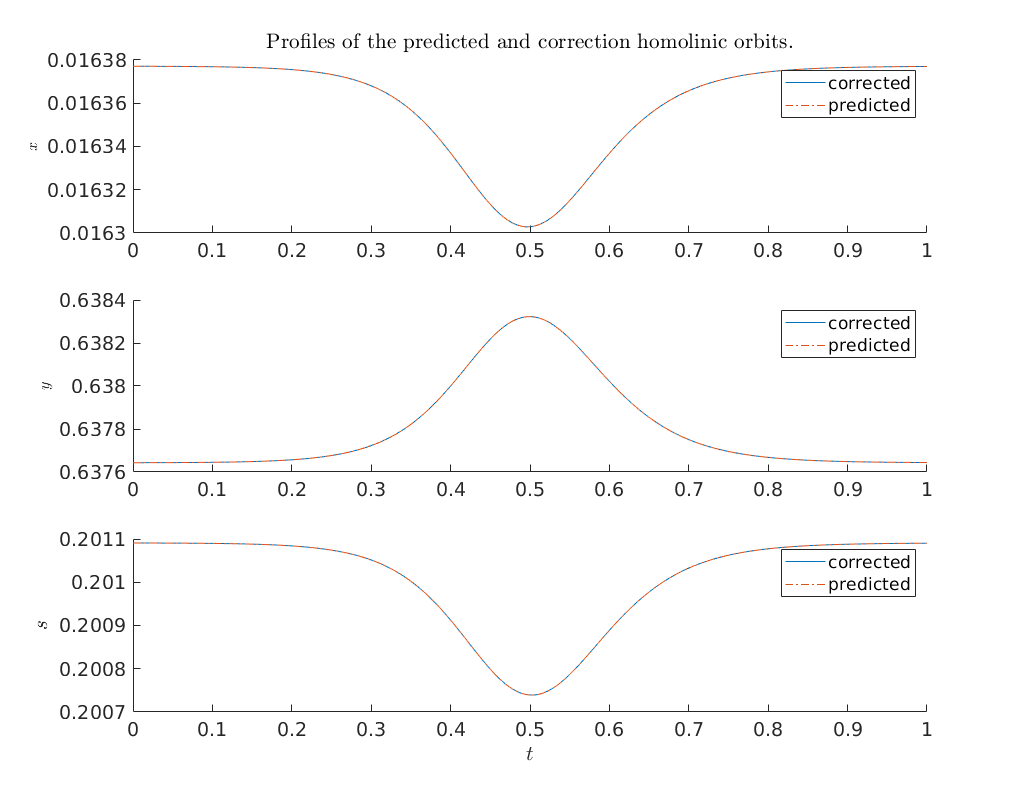

In [11]:
global homds
[homoclinic1_pred, saddle1_pred] = bt_rearr(x1_pred);
subplot(3,1,1); hold on;
title('Profiles of the predicted and correction homolinic orbits.')
plot(homds.finemsh, x1_orbit(1:3:end))
plot(homds.finemsh, homoclinic1_pred(1:3:end),'-.')
legend({'corrected', 'predicted'})
ylabel('$x$', 'fontsize', 12,'interpreter', 'latex')
subplot(3,1,2); hold on;
plot(homds.finemsh, x1_orbit(2:3:end))
plot(homds.finemsh, homoclinic1_pred(2:3:end),'-.')
legend({'corrected','predicted'})
ylabel('$y$', 'fontsize', 12,'interpreter', 'latex')
subplot(3,1,3); hold on;
plot(homds.finemsh, x1_orbit(3:3:end))
plot(homds.finemsh, homoclinic1_pred(3:3:end),'-.')
legend({'corrected',  'predicted'})
xlabel('$t$')
ylabel('$s$')

## Compare predictor and corrected solution in $(x, y)$ phase-space

Below we compare the predicted and corrected homoclinic orbit in $(x, y)$
phase-space, as well as the predicted and corrected saddle point. 

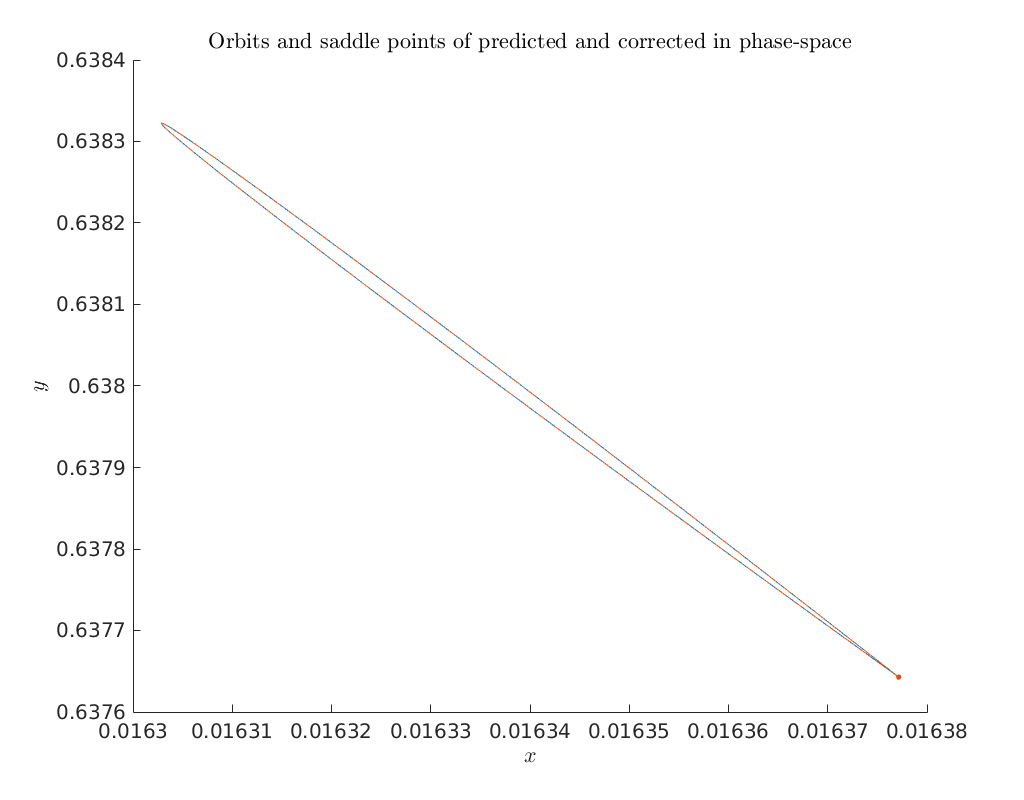

In [12]:
hold on
plot(x1_orbit(1:3:end),x1_orbit(2:3:end))
plot(homoclinic1_pred(1:3:end),homoclinic1_pred(2:3:end),'-.')
plot(x1_saddle(1), x1_saddle(2),'.', 'MarkerSize', 12, 'Color', [0 0.4470 0.7410])
plot(saddle1_pred(1), saddle1_pred(2),'.', 'MarkerSize', 12, 'Color', [0.8500, 0.3250, 0.0980])
xlabel('$x$')
ylabel('$y$')
title('Orbits and saddle points of predicted and corrected in phase-space')

## Continue homoclinic curve emanating from Bogdanov-Takens point

Having obtain an initial approximation `[hom_x, hom_v]`, where `homo_v` is the
tangent vector to the homoclinic curve pointing outwards from the
Bogdanov-Takens point, we can start continuation using the function `cont`.
Since, we are not interested in bifurcations of the homoclinic
orbit, we disable the detection of homoclinic bifurcations
`opt.Singularities = 0`. This will reduce the computational cost. We also set
the maximum number of continuation steps.

In [13]:
opt.Singularities = 0;
opt.MinStepsize  = 1e-06; 
opt.InitStepsize = 1e-03; 
opt.MaxStepsize  = 1e-02; 
opt.MaxNumPoints = 300;
homoclinic_br1 = cont(@homoclinic, hom1_x, hom1_v, opt);

first point found
tangent vector to first point found

elapsed time  = 30.0 secs
npoints curve = 300


## Compare predicted with computed parameters emanating from bt1

Now that we have obtained a curve of homoclinic orbits (`homoclinic_br`) we
compare the computed curve in parameter space with the predicted curve we
construct below. To do so, we use the function `BT_nmfm` to obtain the
parameter-dependent normal form coefficients and the coefficients between the
parameters of the system and the parameters on the center manifold, see
{cite}`Bosschaert@2021`.

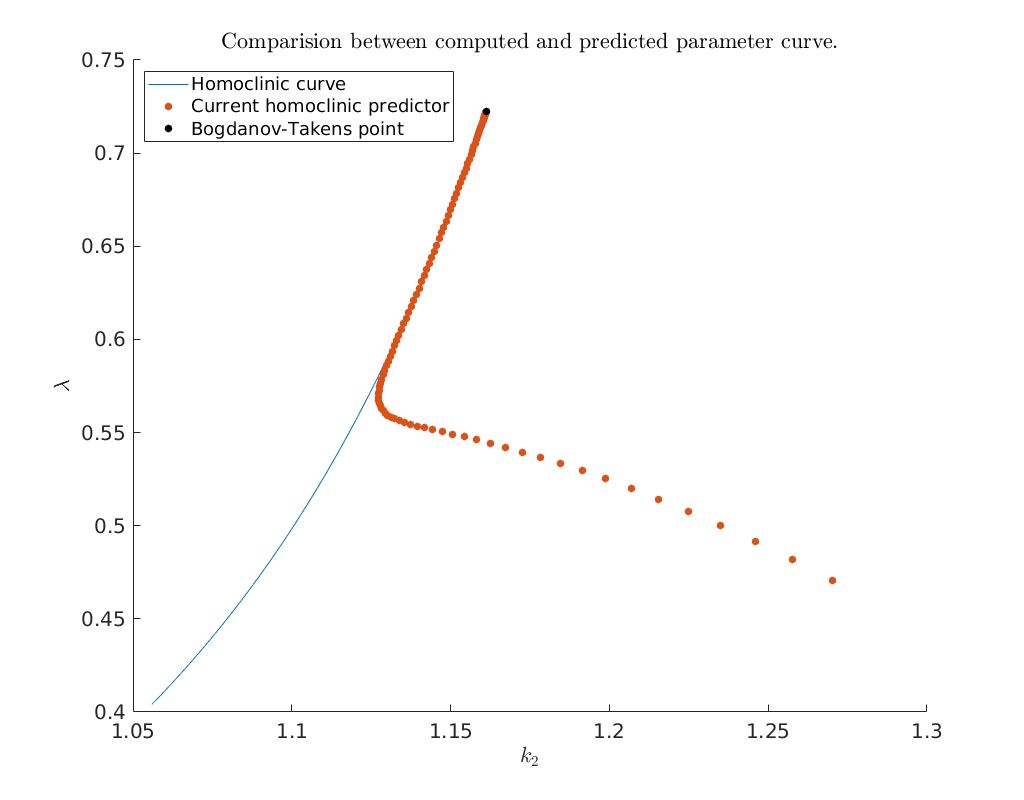

In [14]:
hold on
% plot computed parameter curve
plot(homoclinic_br1(homds.PeriodIdx+1,:), ...
     homoclinic_br1(homds.PeriodIdx+2,:));
% Bogdanov-Takens parameter-dependent normal form coefficients
bt1 = BT_nmfm_orbital(odefile, bt1, ap);
a   = bt1.nmfm.a;
b   = bt1.nmfm.b;
K10 = bt1.nmfm.K10;
K01 = bt1.nmfm.K01;
K02 = bt1.nmfm.K02;
K11 = bt1.nmfm.K11;
K03 = bt1.nmfm.K03;
% construct predictor as in the paper
eps = linspace(0, 1.8);
beta1 = -4*a^3/b^4*eps.^4;
tau0  = 10/7;
tau2  = 288/2401;
beta2 = a/b*(tau0 + tau2*eps.^2).*eps.^2;
alpha = K10.*beta1 + K01.*beta2 + 1/2*K02.*beta2.^2 ...
    + K11.*beta1.*beta2 + 1/6*K03.*beta2.^3;
alpha = bt1.par(ap) + alpha;
% plot currect predictor
plot(alpha(1,:), alpha(2,:), '.')
% plot Bogdanov-Takens point
plot(bt1.par(ind.k2), bt1.par(ind.lambda), '.k', 'MarkerSize', 20)
% set axis labels and legend
xlabel('$k_2$')
ylabel('$\lambda$')
legend({'Homoclinic curve', 'Current homoclinic predictor', ...
    'Bogdanov-Takens point'}, 'Location', 'NorthWest')
title('Comparision between computed and predicted parameter curve.')

## Bifurcation diagram in $(x,s)$ phase-space

To obtain an impression of the homoclinic solutions we plot the computed
homoclinic orbits in $(x,s)$ phase-space.

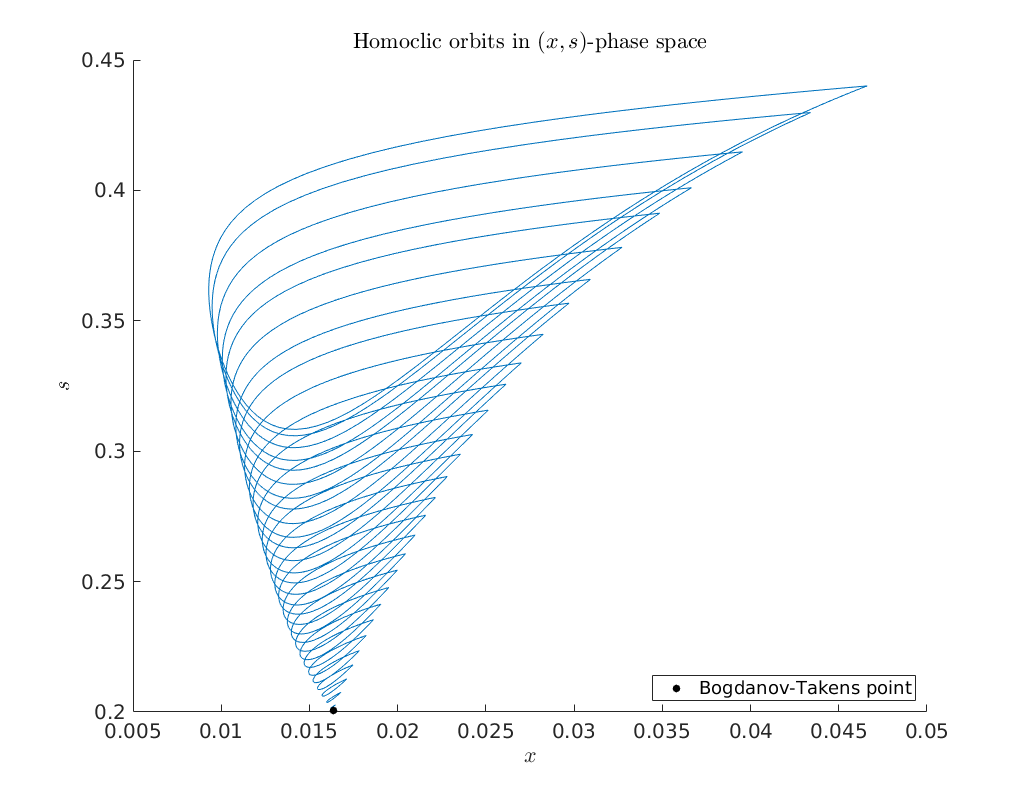

In [15]:
hold on
%plot naive
plot(homoclinic_br1(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br1(homds.coords(3:homds.nphase:end), 1:10:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$x$')
ylabel('$s$')
plot(bt1.x(1), bt1.x(3), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthEast')
title('Homoclic orbits in $(x,s)$-phase space')

## Continue homoclinic curve emanating from Bogdanov-Takens point

We continue the homoclinic orbit as usual with the __MatCont__ function `cont`.
However, since we already corrected the initial prediction to the homoclinic
orbits, we use this correction as an initial starting point of continuation in
stead of the predictor. If one isn't interested in the correction of the
initial point, the prediction could be used directly as argument to `cont`.
Lastly, since, here, we are not interested in bifurcations of the homoclinic
orbit, we disable the detection of homoclinic bifurcations. This will
reduce the computational cost.

In [16]:
bt2_index = bt_points_info(2).index;
bt2.x = lp_br1(1:3, bt2_index);
bt2.par = p';
bt2.par(ap) = lp_br1(4:5, bt2_index);
options = BT_Hom_set_options();
[x2_pred, v2_pred] = init_BT_Hom(odefile, bt2,  ap, options);
homoclinic_br2 = cont(@homoclinic, x2_pred, v2_pred, opt);

BT normal form coefficients:
a=-8.378444e-02,	 b=-2.136280e+00
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.00110154
The initial half-return time T: 1052.82
The initial distance time eps0: 6.38083e-07
The initial distance time eps1: 2.06064e-06
first point found
tangent vector to first point found

elapsed time  = 26.4 secs
npoints curve = 300


## Continue Hopf point from the first Bogdanov-Takens point

We convert the first Bogdanov-Takens point into a Hopf point in order to
start continuation of the Hopf bifurcation curve.

In [17]:
[hopf_x, hopf_v] = init_BT_H(odefile, bt1.x, bt1.par, ap);

We continue the Hopf point using the function `cont`. Then we try to filter out
the neutral saddle points by inspecting the eigenvalues.

In [18]:
opt.MaxNumPoints = 2000;
opt.Singularities = 1;
opt.Eigenvalues = 1;
[hopf_br, ~, hopf_br_bif, ~, eigenvalues] = cont(@hopf, hopf_x, hopf_v, opt);
neutral_saddle_br = hopf_br(:,abs(imag(eigenvalues(2,:))) < 0.00001);
hopf_br_corrected = hopf_br(:,abs(imag(eigenvalues(2,:))) >= 0.00001);

first point found
tangent vector to first point found
> In nf_H (line 27)
In hopf>testf (line 150)
In cont>EvalTestFunc (line 810)
In cont (line 506)

> In nf_H (line 28)
In hopf>testf (line 150)
In cont>EvalTestFunc (line 810)
In cont (line 506)

label = BT, x = ( 0.016337 0.638410 0.200456 1.161199 0.722339 0.000000 )
(a,b)=(-4.822565e-02, -1.937633e+00)
label = BT, x = ( 0.115909 0.315467 0.288437 1.417628 0.971398 0.000000 )
(a,b)=(8.378444e-02, 2.136280e+00)
label = GH, x = ( 0.064311 0.211095 0.554870 0.924255 0.305879 0.003512 )
l2=-2.401234e+02
label = GH, x = ( 0.018022 0.368238 0.497968 0.891319 0.232487 0.003324 )
l2=-7.769003e+02
Closed curve detected at step 1241

elapsed time  = 3.6 secs
npoints curve = 1241


We see that in addition to the two Bogdanov-Takens points already detected
before, there are also two generalized Hopf points (GH) detected. 

## Bifurcation diagram in phase-space $(x,s)$

Below we plot the computed homoclinic orbits in $(x,s)$ phase-space.

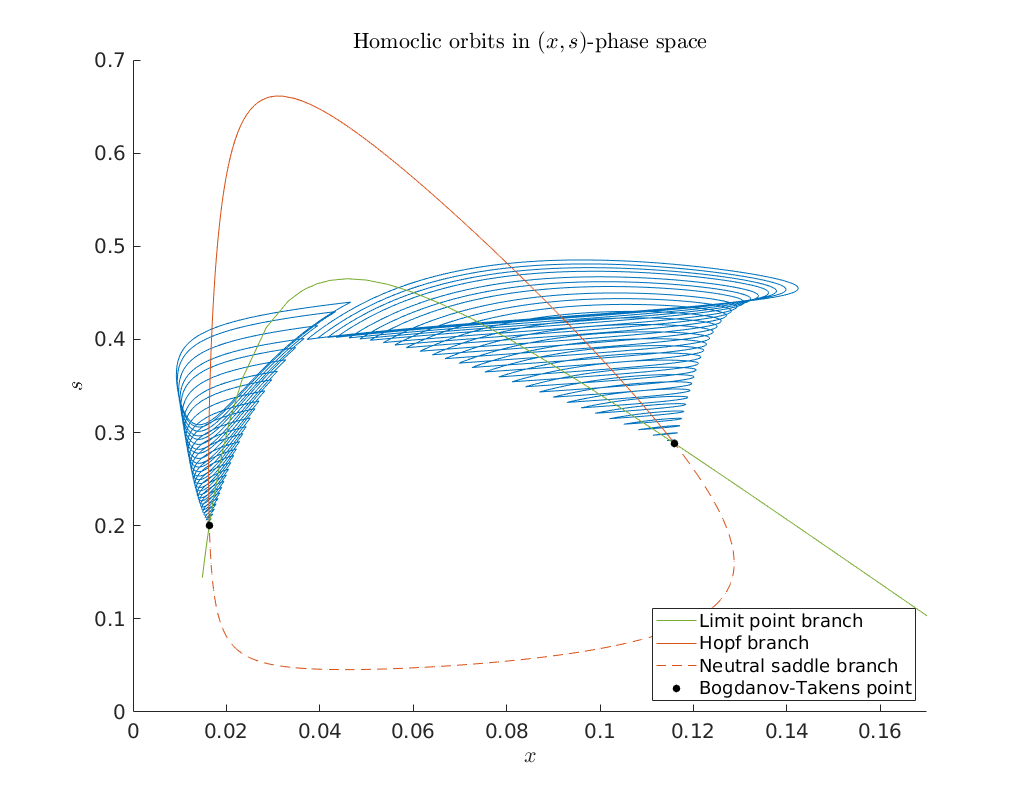

In [19]:
hold on
colormap = lines();
homColor  = colormap(1,:);
hopfColor = colormap(2,:);
foldColor = colormap(5,:);
plot(homoclinic_br1(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br1(homds.coords(3:homds.nphase:end), 1:10:end), ...
     'Color', homColor, 'HandleVisibility', 'Off')
plot(homoclinic_br2(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br2(homds.coords(3:homds.nphase:end), 1:10:end), ...
     'Color', homColor, 'HandleVisibility', 'Off')
plot(lp_br1(1,:), lp_br1(3,:), 'Color', foldColor)
plot(hopf_br_corrected(1,:), hopf_br_corrected(3,:), 'Color', hopfColor)
plot(neutral_saddle_br(1,1:end-1), neutral_saddle_br(3,1:end-1), '--', ...
    'Color', hopfColor)
xlabel('$x$')
ylabel('$s$')
plot(bt1.x(1), bt1.x(3), '.k')
plot(bt2.x(1), bt2.x(3), '.k', 'HandleVisibility', 'Off')
legend('Limit point branch', 'Hopf branch', 'Neutral saddle branch', ...
    'Bogdanov-Takens point', 'Location', 'SouthEast')
title('Homoclic orbits in $(x,s)$-phase space')
axis([0 0.17 0 0.7])

## Bifurcation diagram in parameter-space $(k_2, \lambda)$

We finish this notebook by plotting the computed homoclinic orbits in $(x,s)$ phase-space.

Below we extract the cusp bifurcation point and the generalized Hopf points on
the limit point branch and Hopf branch respectively.

In [20]:
cusp_point_info = lp_br1_bif(strcmp({lp_br1_bif.label}, 'CP')==1);
genh_info = hopf_br_bif(strcmp({hopf_br_bif.label}, 'GH')==1);
cusp = lp_br1(:,cusp_point_info.index);
genh1 = hopf_br(:,genh_info(1).index);
genh2 = hopf_br(:,genh_info(2).index);

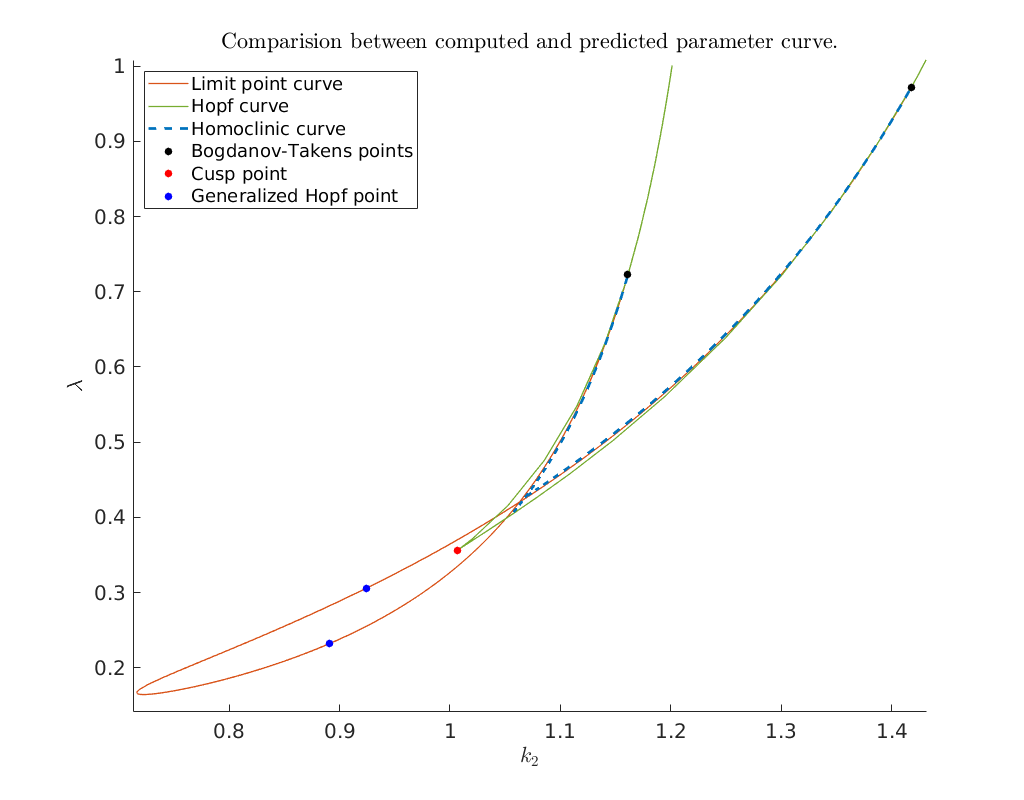

In [21]:
hold on
% plot computed parameter curve
plot(hopf_br_corrected(4,:), hopf_br_corrected(5,:), 'Color', hopfColor, 'linewidth', 1)
plot(lp_br1(4,:), lp_br1(5,:), 'Color', foldColor, 'linewidth', 1)
% plot homoclinic curves
plot(homoclinic_br1(homds.PeriodIdx+1,:), homoclinic_br1(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2)
plot(homoclinic_br2(homds.PeriodIdx+1,:), homoclinic_br2(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'HandleVisibility', 'Off', 'linewidth', 2)
% plot Bogdanov-Takens point
plot(bt1.par(ind.k2), bt1.par(ind.lambda), '.k')
plot(bt2.par(ind.k2), bt2.par(ind.lambda), '.k', 'HandleVisibility', 'Off')
plot(cusp(4), cusp(5), '.r')
plot(genh1(4), genh1(5), '.b')
plot(genh2(4), genh2(5), '.b', 'HandleVisibility', 'Off')
% set axis, labels and legend
xlabel('$k_2$')
ylabel('$\lambda$')
legend({'Limit point curve', 'Hopf curve', 'Homoclinic curve', ... 
    'Bogdanov-Takens points', 'Cusp point', 'Generalized Hopf point'}, ...
    'Location', 'NorthWest')
title('Comparision between computed and predicted parameter curve.')
axis([0.7130    1.4320    0.1413    1.0081])

## Convergence plot

We finish this notebook with a log-log convergence plot comparing the different
third order homoclinic approximation methods derived in {cite}`Bosschaert@2021`
to approximate the homoclinic solutions near the first Bogdanov-Takens point.
On the abscissa is the amplitude $A_0$ and on the ordinate the relative error
$\delta$ between the constructed solution (`x_pred`) to the defining system for the
homoclinic orbit and the Newton corrected solution (`x_corrected`).

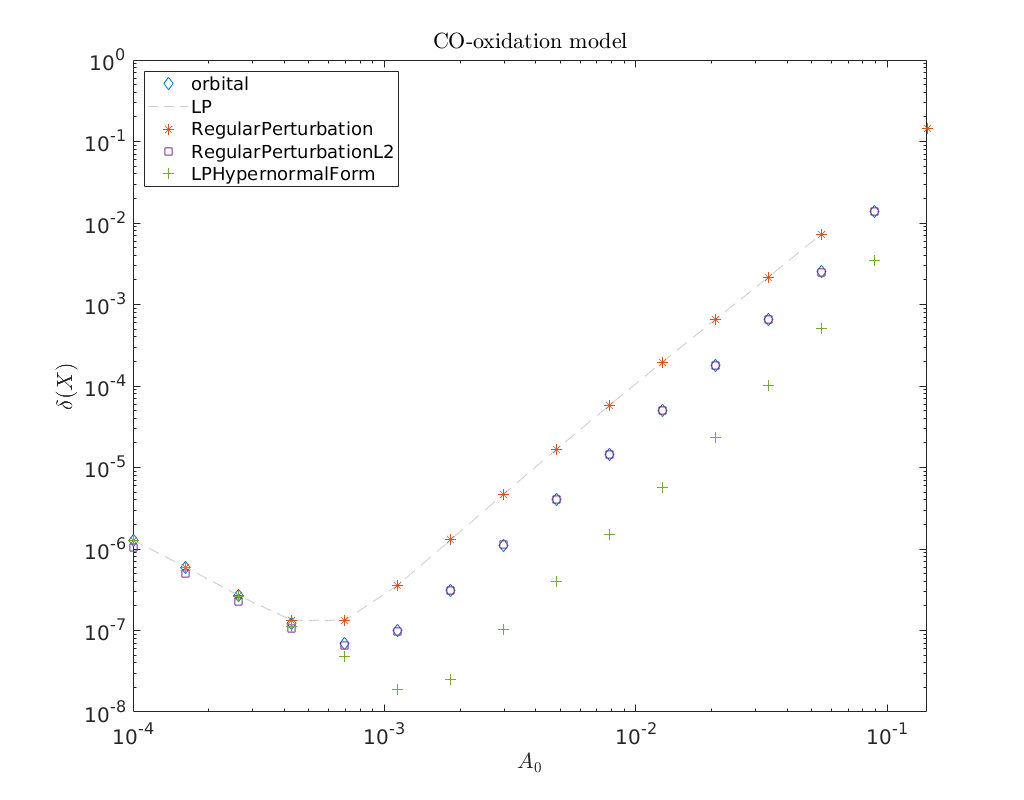

In [22]:
set(groot, 'defaultLineMarkerSize', 7);
options = BT_Hom_set_options();
options.TTolerance = 1e-05;
options.messages = false;
options.correct = false;

amplitudes = logspace(-4, 0, 20);
methodList = {'orbital', 'LP', 'RegularPerturbation', ...
    'RegularPerturbationL2', 'LPHypernormalForm'};
relativeErrors = {};
for i=1:length(methodList)
    options.method = methodList{i};
    relativeErrors{i} = zeros(size(amplitudes));
    for j=1:length(amplitudes)
    options.amplitude = amplitudes(j);
    [x_pred, v0] = init_BT_Hom(odefile, bt1, ap, options);
    try
        x_corrected = newtcorr(x_pred, v0);
        relativeErrors{i}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
    catch
        warning('Did not converge.')
        continue
    end
  end
end

cm = lines();
loglog(amplitudes, relativeErrors{1}(:), 'd', ...
       amplitudes, relativeErrors{2}(:), '--', ...
       amplitudes, relativeErrors{3}(:), '*', ...
       amplitudes, relativeErrors{4}(:), 's', ...
       amplitudes, relativeErrors{5}(:), '+')
legend(methodList, 'Location', 'NorthWest')
title('CO-oxidation model')
xlabel('$A_0$')
ylabel('$\delta(X)$')
ax = gca;
ax.ColorOrder = [cm(1,:); [0.8 0.8 0.8]; cm(2,:); cm(4,:); cm(5,:)];